In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
image=cv2.imread('GreenUnoCard.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #convert from BGR to RGB
width=600 #resize for faster processing

2.4193548387096775


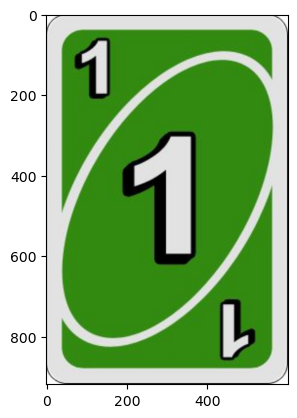

In [22]:
(h,w)=image.shape[:2]
aspect_ratio=width/float(w)
print(aspect_ratio)
height=int(h*aspect_ratio)
resized_image=cv2.resize(image,(width,height))
plt.imshow(resized_image)

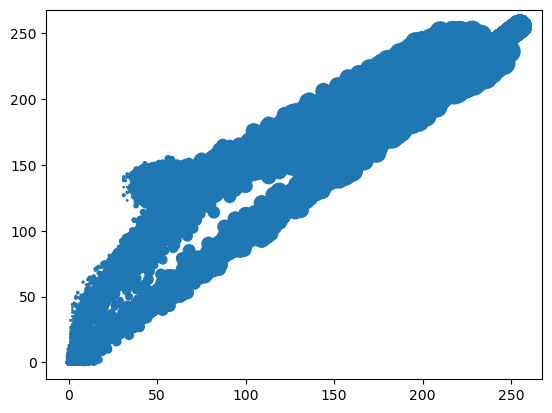

(551400, 3)


C:\Users\HP\anaconda3\envs\tolga1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
#Get dominant color
k=4
#reshape the image to be a list of pixels
image=resized_image.reshape((resized_image.shape[0]*resized_image.shape[1],3))
plt.scatter(image[:,0],image[:,1], image[:,2])
plt.show()
print(image.shape)
kmeans=KMeans(n_clusters=k)
kmeans.fit(image)
counts=np.bincount(kmeans.labels_)


In [28]:
counts

array([338084, 165019,  30622,  17675], dtype=int64)

In [29]:
dominant_color=kmeans.cluster_centers_[np.argmax(counts)]

In [30]:
print(dominant_color)

[ 51.22627284 137.20729229  17.90284043]


In [31]:
#classify the detected color
rgb_color=dominant_color
red,green,blue=rgb_color
if red>green and red>blue:
    color_name='Red'
elif green>red and green>blue:
    color_name='Green'
elif blue>red and blue>green:
    color_name='Blue'
else:
    color_name='Yellow'
print(color_name)

Green
